<font color=red><h1> 1. Loading data and packages</h1></font>

<font color=green><h2> 1.1 Loading packages</h2></font>

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import mplfinance as mpf
import plotly.graph_objs as go
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


<font color=green><h2> 1.2 Loading Data</h2></font>

In [21]:
#Download AAPL's shares data from 2010-01-01 to 2012-01-01

Ticker='AAPL'
#Start date =2010-01-01
start_date=datetime.strptime('2010-01-01','%Y-%m-%d').date()
#End date=2012-01-01
end_date=datetime.strptime('2012-01-01','%Y-%m-%d').date()

Data=yf.download(Ticker,start_date,end_date)
#Data_close stores the closing prices only
Data_close=Data.loc[:,'Close']

print(tabulate(pd.DataFrame(Data.head()),headers="keys", tablefmt='fancy_grid'))

[*********************100%%**********************]  1 of 1 completed

╒═════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════════╤═════════════╕
│ Date                │    Open │    High │     Low │   Close │   Adj Close │      Volume │
╞═════════════════════╪═════════╪═════════╪═════════╪═════════╪═════════════╪═════════════╡
│ 2010-01-04 00:00:00 │ 7.6225  │ 7.66071 │ 7.585   │ 7.64321 │     6.44741 │ 4.9373e+08  │
├─────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ 2010-01-05 00:00:00 │ 7.66429 │ 7.69964 │ 7.61607 │ 7.65643 │     6.45856 │ 6.01905e+08 │
├─────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ 2010-01-06 00:00:00 │ 7.65643 │ 7.68679 │ 7.52679 │ 7.53464 │     6.35583 │ 5.5216e+08  │
├─────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ 2010-01-07 00:00:00 │ 7.5625  │ 7.57143 │ 7.46607 │ 7.52071 │     6.34408 │ 4.77131e+08 │
├─────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼───

<font color=green><h2> 1.3 Data Visualisation</h2></font>

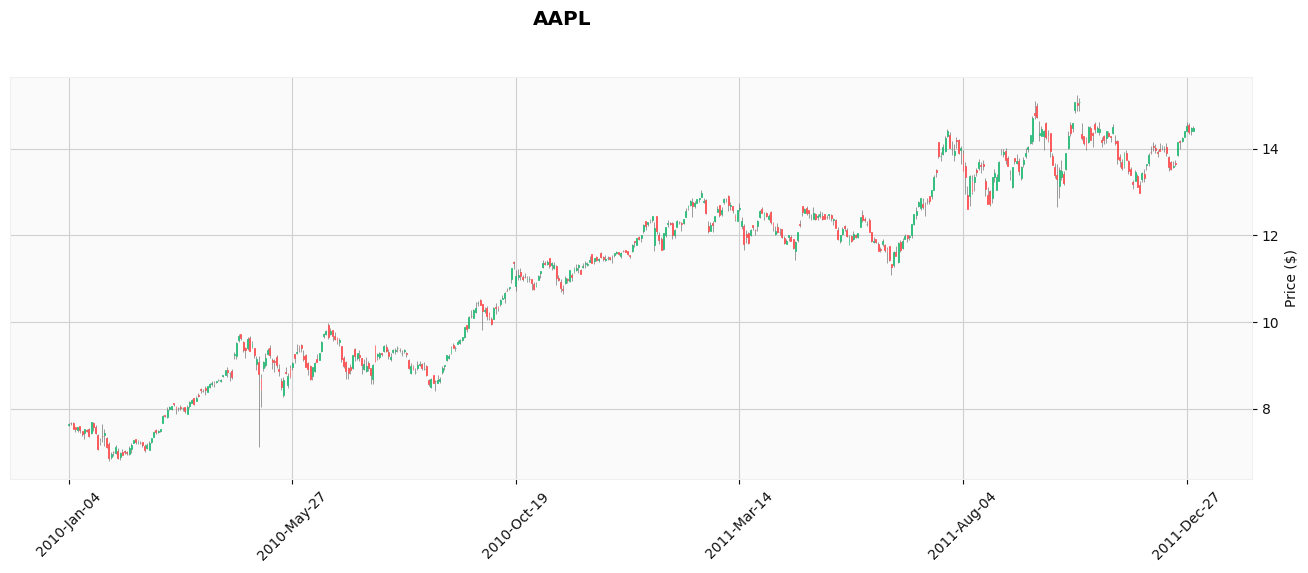

In [16]:
Trace= go.Scatter(x=Data_close.index,y=Data_close.values,name=Ticker,line=dict(color='blue', width=2),marker=dict(size=2))

layout = go.Layout(xaxis = dict(title = 'Date'),yaxis = dict(title = 'Close'),template = 'plotly_white' )

fig = go.Figure(data=Trace, layout=layout)

fig.show()
mpf.plot(Data, type='candle', style='yahoo', title=Ticker,ylabel='Price ($)',figratio=(15, 5))

![closing prices](cusum1.JPG)

<font color=red><h1> 2. Model Development</h1></font>

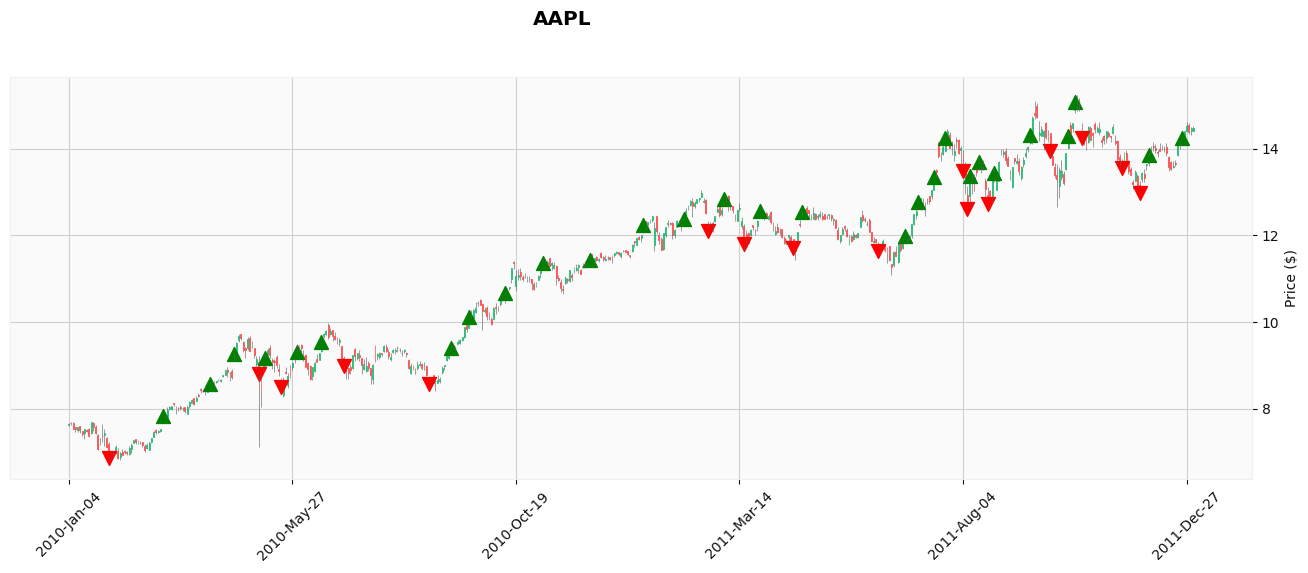

In [28]:
# threshold for buying signals
threshold_buy=0.7
# Threshold for selling signals
threshold_sell=0.8

# Differences is a Serie of close_price(t)-close_price(t-1)
Differences=Data_close.diff()

posi_change=0
nega_change=0

#Buy_signals is a Series used to capture when buying signals are triggered
Buy_signals=pd.Series(index=Data_close.index)
#Sell_signals is a Series used to capture when selling signals are triggered
Sell_signals=pd.Series(index=Data_close.index)

for i in range(len(Differences)):
    posi_change=max(0,posi_change+Differences[i])
    nega_change=min(0,nega_change+Differences[i])

    if posi_change>threshold_buy:
        posi_change=0
        buy_index=Data_close.index[i]
        Buy_signals.loc[buy_index]=Data_close[i]
        
    if nega_change<-threshold_sell:
        nega_change=0
        sell_index=Data_close.index[i]
        Sell_signals.loc[sell_index]=Data_close[i]


Buy_triangles=mpf.make_addplot(Buy_signals,scatter=True,markersize=100,marker='^',color='green')
Sell_triangles=mpf.make_addplot(Sell_signals,scatter=True,markersize=100,marker='v',color='red')
mpf.plot(Data, type='candle', style='yahoo', title=Ticker,addplot=[Buy_triangles,Sell_triangles],ylabel='Price ($)',figratio=(15, 5))